In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import imageio
import skimage.draw
from skimage import io, feature
import math
import sys
import ipywidgets as widgets
from ipywidgets import interact
import os
np.set_printoptions(threshold=sys.maxsize)
from skimage.filters.edges import convolve
import skimage.morphology as mp
from skimage.morphology import square
from skimage.filters import frangi, hessian, sobel
#import cv2 as cv



def img2gray(image):
    x=image.shape[0]
    y=image.shape[1]
    img = np.zeros( (x, y), dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i,j,1]<40):
                img[i,j]=0
            elif(sum(image[i,j])<100):
                img[i,j]=0
            else:
                img[i,j]=255-np.clip(image[i,j,1],0,140)
    return img

def img2gray_1(image):
    x=image.shape[0]
    y=image.shape[1]
    img = np.zeros( (x, y), dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):       
            img[i,j]=np.clip(image[i,j,1],0,100)+np.sqrt(np.clip(image[i,j,1]-100,0,155))
    return img

def comp(image, image1):
    x=image.shape[0]
    y=image.shape[1]
    img = np.zeros( (x, y), dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i,j])<80:
                img[i,j]=0
            else:
                img[i,j]=np.clip(image[i,j]-image1[i,j], 40, 255)        
    return img

def comp_2(image, image1):
    x=image.shape[0]
    y=image.shape[1]
    img = np.zeros( (x, y), dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]-image1[i,j]>0.85*image[i,j]:
                img[i,j]=255
            else:
                img[i,j]=0           
    return img


def apply_mask(img, mask):
    image = np.ndarray(shape=img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if mask[i,j] == 255:
                image[i,j]=[0, 255, 0]
            else:
                image[i,j]=img[i,j]
    return image



In [2]:

directory = 'stare-images'
images = widgets.Dropdown(options=os.listdir(directory))

# Updates the image options based on directory value
def update_images(*args):
    images.options = os.listdir(directory.value)
    
def show_images(file):
    img = imageio.imread(f'stare-images/{file}').astype('uint8')
    plt.imshow(img)
_ = interact(show_images, file=images)

interactive(children=(Dropdown(description='file', options=('im0001.ppm', 'im0002.ppm', 'im0003.ppm', 'im0004.…

[176  90  47]


Text(0.5, 1.0, 'Final result')

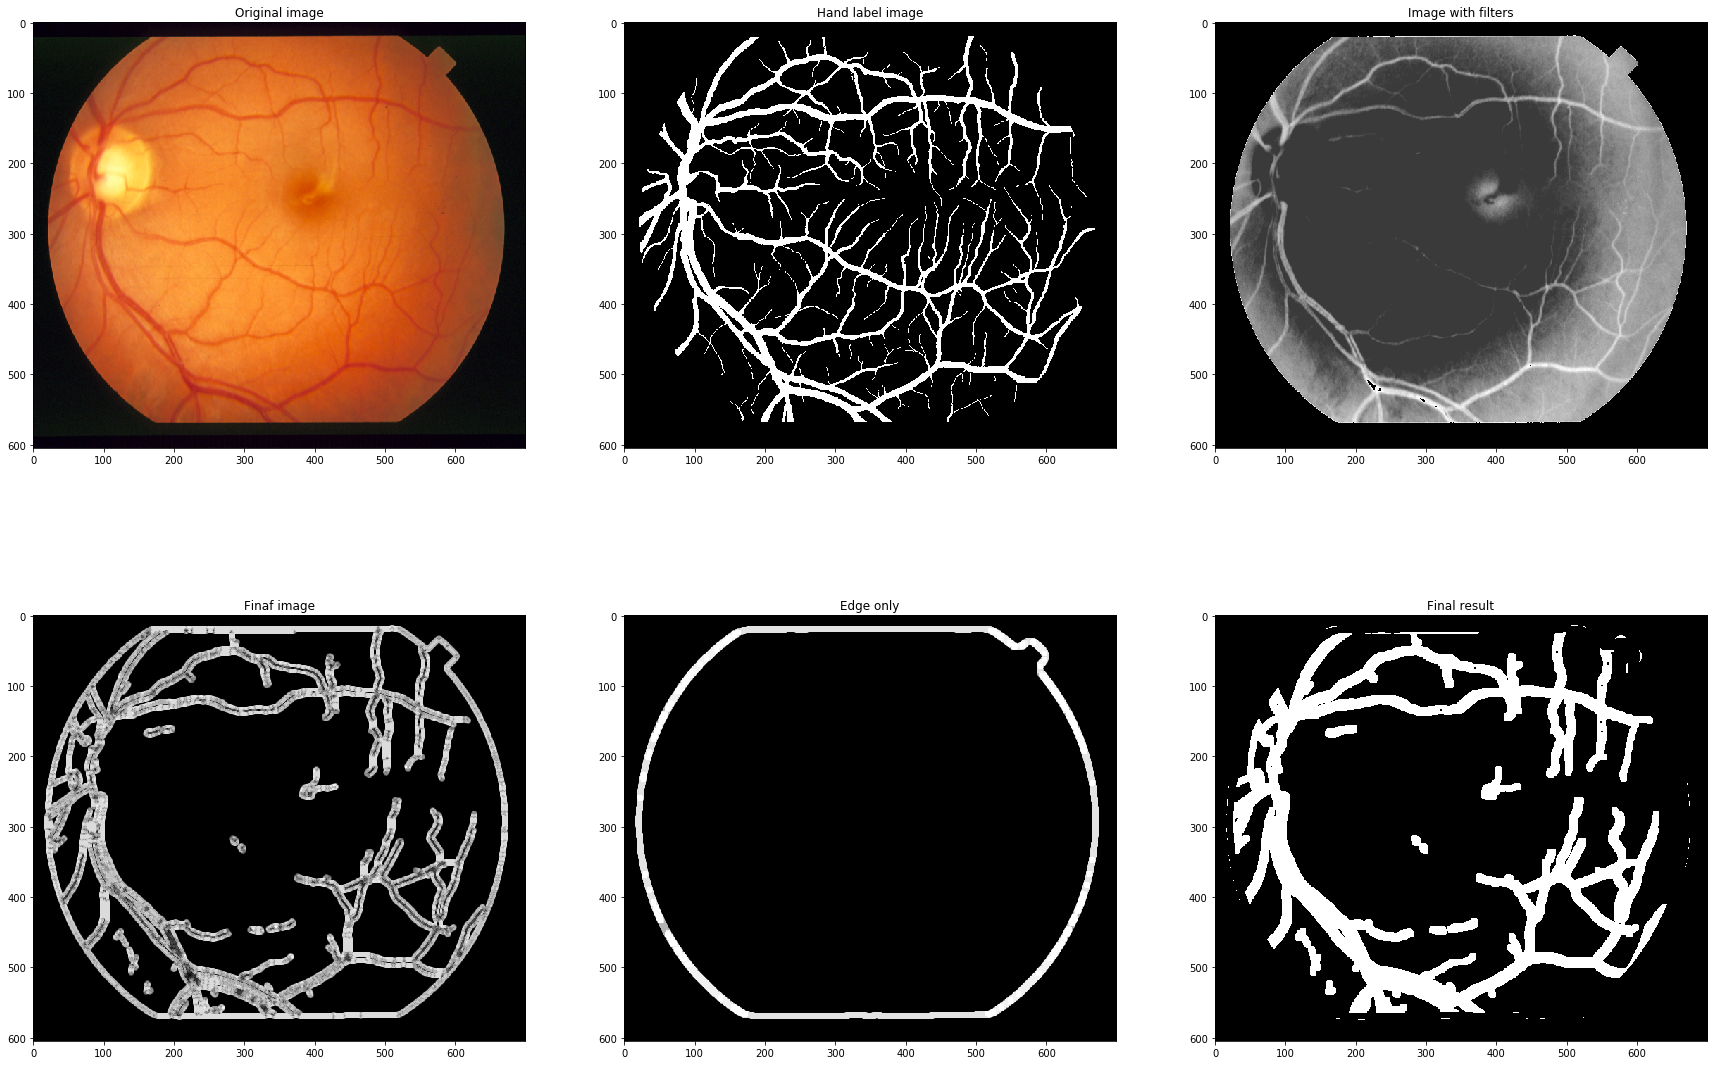

In [18]:
img = imageio.imread(f'stare-images/{images.value}').astype('uint8')
file2=images.value.rstrip('.ppm')+'.vk.ppm'
label = imageio.imread(f'labels-vk/{file2}').astype('uint8')


f_0 =comp(img2gray(img),img2gray_1(img))
f_1 = mp.dilation(sobel(sobel(sobel(feature.canny(f_0, sigma=1)))))
edge=sobel(feature.canny(img2gray(img), sigma=6))
edge=mp.dilation(edge,square(7))
mask= comp_2(f_1,edge)  
print(img[100,100])
    

fig, ax = plt.subplots(ncols=3, figsize=(30, 20), nrows=2)

ax[0][0].imshow(img.astype('uint8'))
ax[0][0].set_title('Original image')
    
ax[0][1].imshow(label, cmap=plt.cm.gray)
ax[0][1].set_title('Hand label image')
ax[0][2].imshow(f_0, cmap=plt.cm.gray)
ax[0][2].set_title('Image with filters')
    
ax[1][0].imshow(f_1, cmap=plt.cm.gray)
ax[1][0].set_title('Finaf image')

ax[1][1].imshow(edge, cmap=plt.cm.gray)
ax[1][1].set_title('Edge only')

ax[1][2].imshow(mask, cmap=plt.cm.gray)
ax[1][2].set_title('Final result')



Ocena skuteczności

In [5]:
print(images.options)

('im0001.ppm', 'im0002.ppm', 'im0003.ppm', 'im0004.ppm', 'im0005.ppm', 'im0044.ppm', 'im0077.ppm', 'im0081.ppm', 'im0082.ppm', 'im0139.ppm', 'im0162.ppm', 'im0163.ppm', 'im0235.ppm', 'im0236.ppm', 'im0239.ppm', 'im0240.ppm', 'im0255.ppm', 'im0291.ppm', 'im0319.ppm', 'im0324.ppm')


In [12]:
tp=[]
tn=[]
fp=[]
fn=[]
masks=[]
#for i in range(len(images.options)):
for i in range(14):
    print(images.options[i])
    tp.append(0)
    tn.append(0)
    fp.append(0)
    fn.append(0)
    if i < 9:
        continue
    img = imageio.imread(f'stare-images/{images.options[i]}').astype('uint8')
    file2=images.options[i].rstrip('.ppm')+'.vk.ppm'
    label = imageio.imread(f'labels-vk/{file2}').astype('uint8')


    f_0 =comp(img2gray(img),img2gray_1(img))
    f_1 = mp.dilation(sobel(sobel(sobel(feature.canny(f_0, sigma=1)))))
    edge=sobel(feature.canny(img2gray(img), sigma=6))
    edge=mp.dilation(edge,square(7))
    mask= comp_2(f_1,edge)
    masks.append(mask)
    for k in range(img.shape[0]):
        for j in range(img.shape[1]):
            if mask[k][j] == 255:
                if label[k][j] == 255:
                     tp[i]+=1
                else:
                     fp[i]+=1                 
            else:
                if label[k][j] == 255:
                     fn[i]+=1
                else:
                     tn[i]+=1 

im0001.ppm
im0002.ppm
im0003.ppm
im0004.ppm
im0005.ppm
im0044.ppm
im0077.ppm
im0081.ppm
im0082.ppm
im0139.ppm
im0162.ppm
im0163.ppm
im0235.ppm
im0236.ppm


In [13]:
accuracy=[]
sensitivity=[]
specificity=[]
for i in range(len(tp)):
    if i < 9:
        accuracy.append(0)
        sensitivity.append(0)
        specificity.append(0)
    else:
        accuracy.append((tp[i]+tn[i])/(tp[i]+tn[i]+fp[i]+fn[i]))
        sensitivity.append(tp[i]/(tp[i]+fn[i]))
        specificity.append(tn[i]/(tn[i]+fp[i]))

In [14]:
for i in range(9, 14):
    print(accuracy[i])
    print(sensitivity[i])
    print(specificity[i])
    print(tp[i])
    print(tn[i])
    print(fp[i])
    print(fn[i])

0.7526706021251476
0.8323572587499034
0.7382973089733406
53866
264890
93895
10849
0.7794687131050767
0.7498659849078388
0.7832975109200583
36370
293735
81263
12132
0.8454687131050768
0.6264535179716934
0.8741943669119513
30762
327294
47101
18343
0.848663518299882
0.6149237746205466
0.8870631187404294
36746
322663
41080
23011
0.8584391971664699
0.6642061826331329
0.8881719024825881
37343
326206
41072
18879


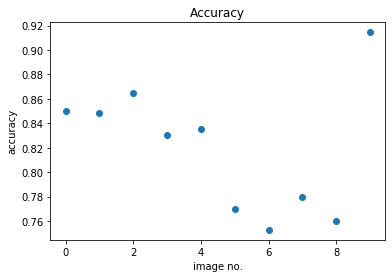

In [46]:
plt.plot(accuracy, 'o')
plt.xlabel("image no.")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.savefig("accuracy.png")

Text(0.5, 1.0, 'Sensitivity')

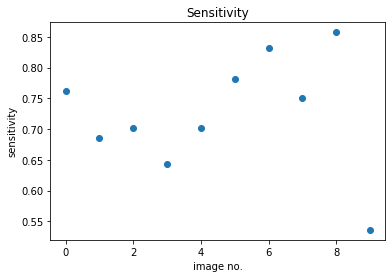

In [38]:
plt.plot(sensitivity, 'o')
plt.xlabel("image no.")
plt.ylabel("sensitivity")
plt.title("Sensitivity")
plt.savefig("sensitivity.png")

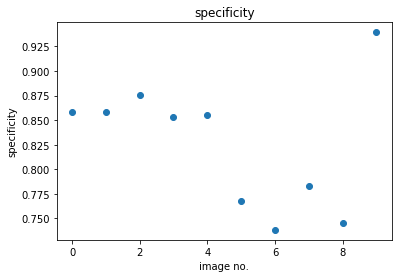

In [45]:
fig=plt.plot(specificity, 'o')
plt.xlabel("image no.")
plt.ylabel("specificity")
plt.title("specificity")
plt.savefig("specificity.png")

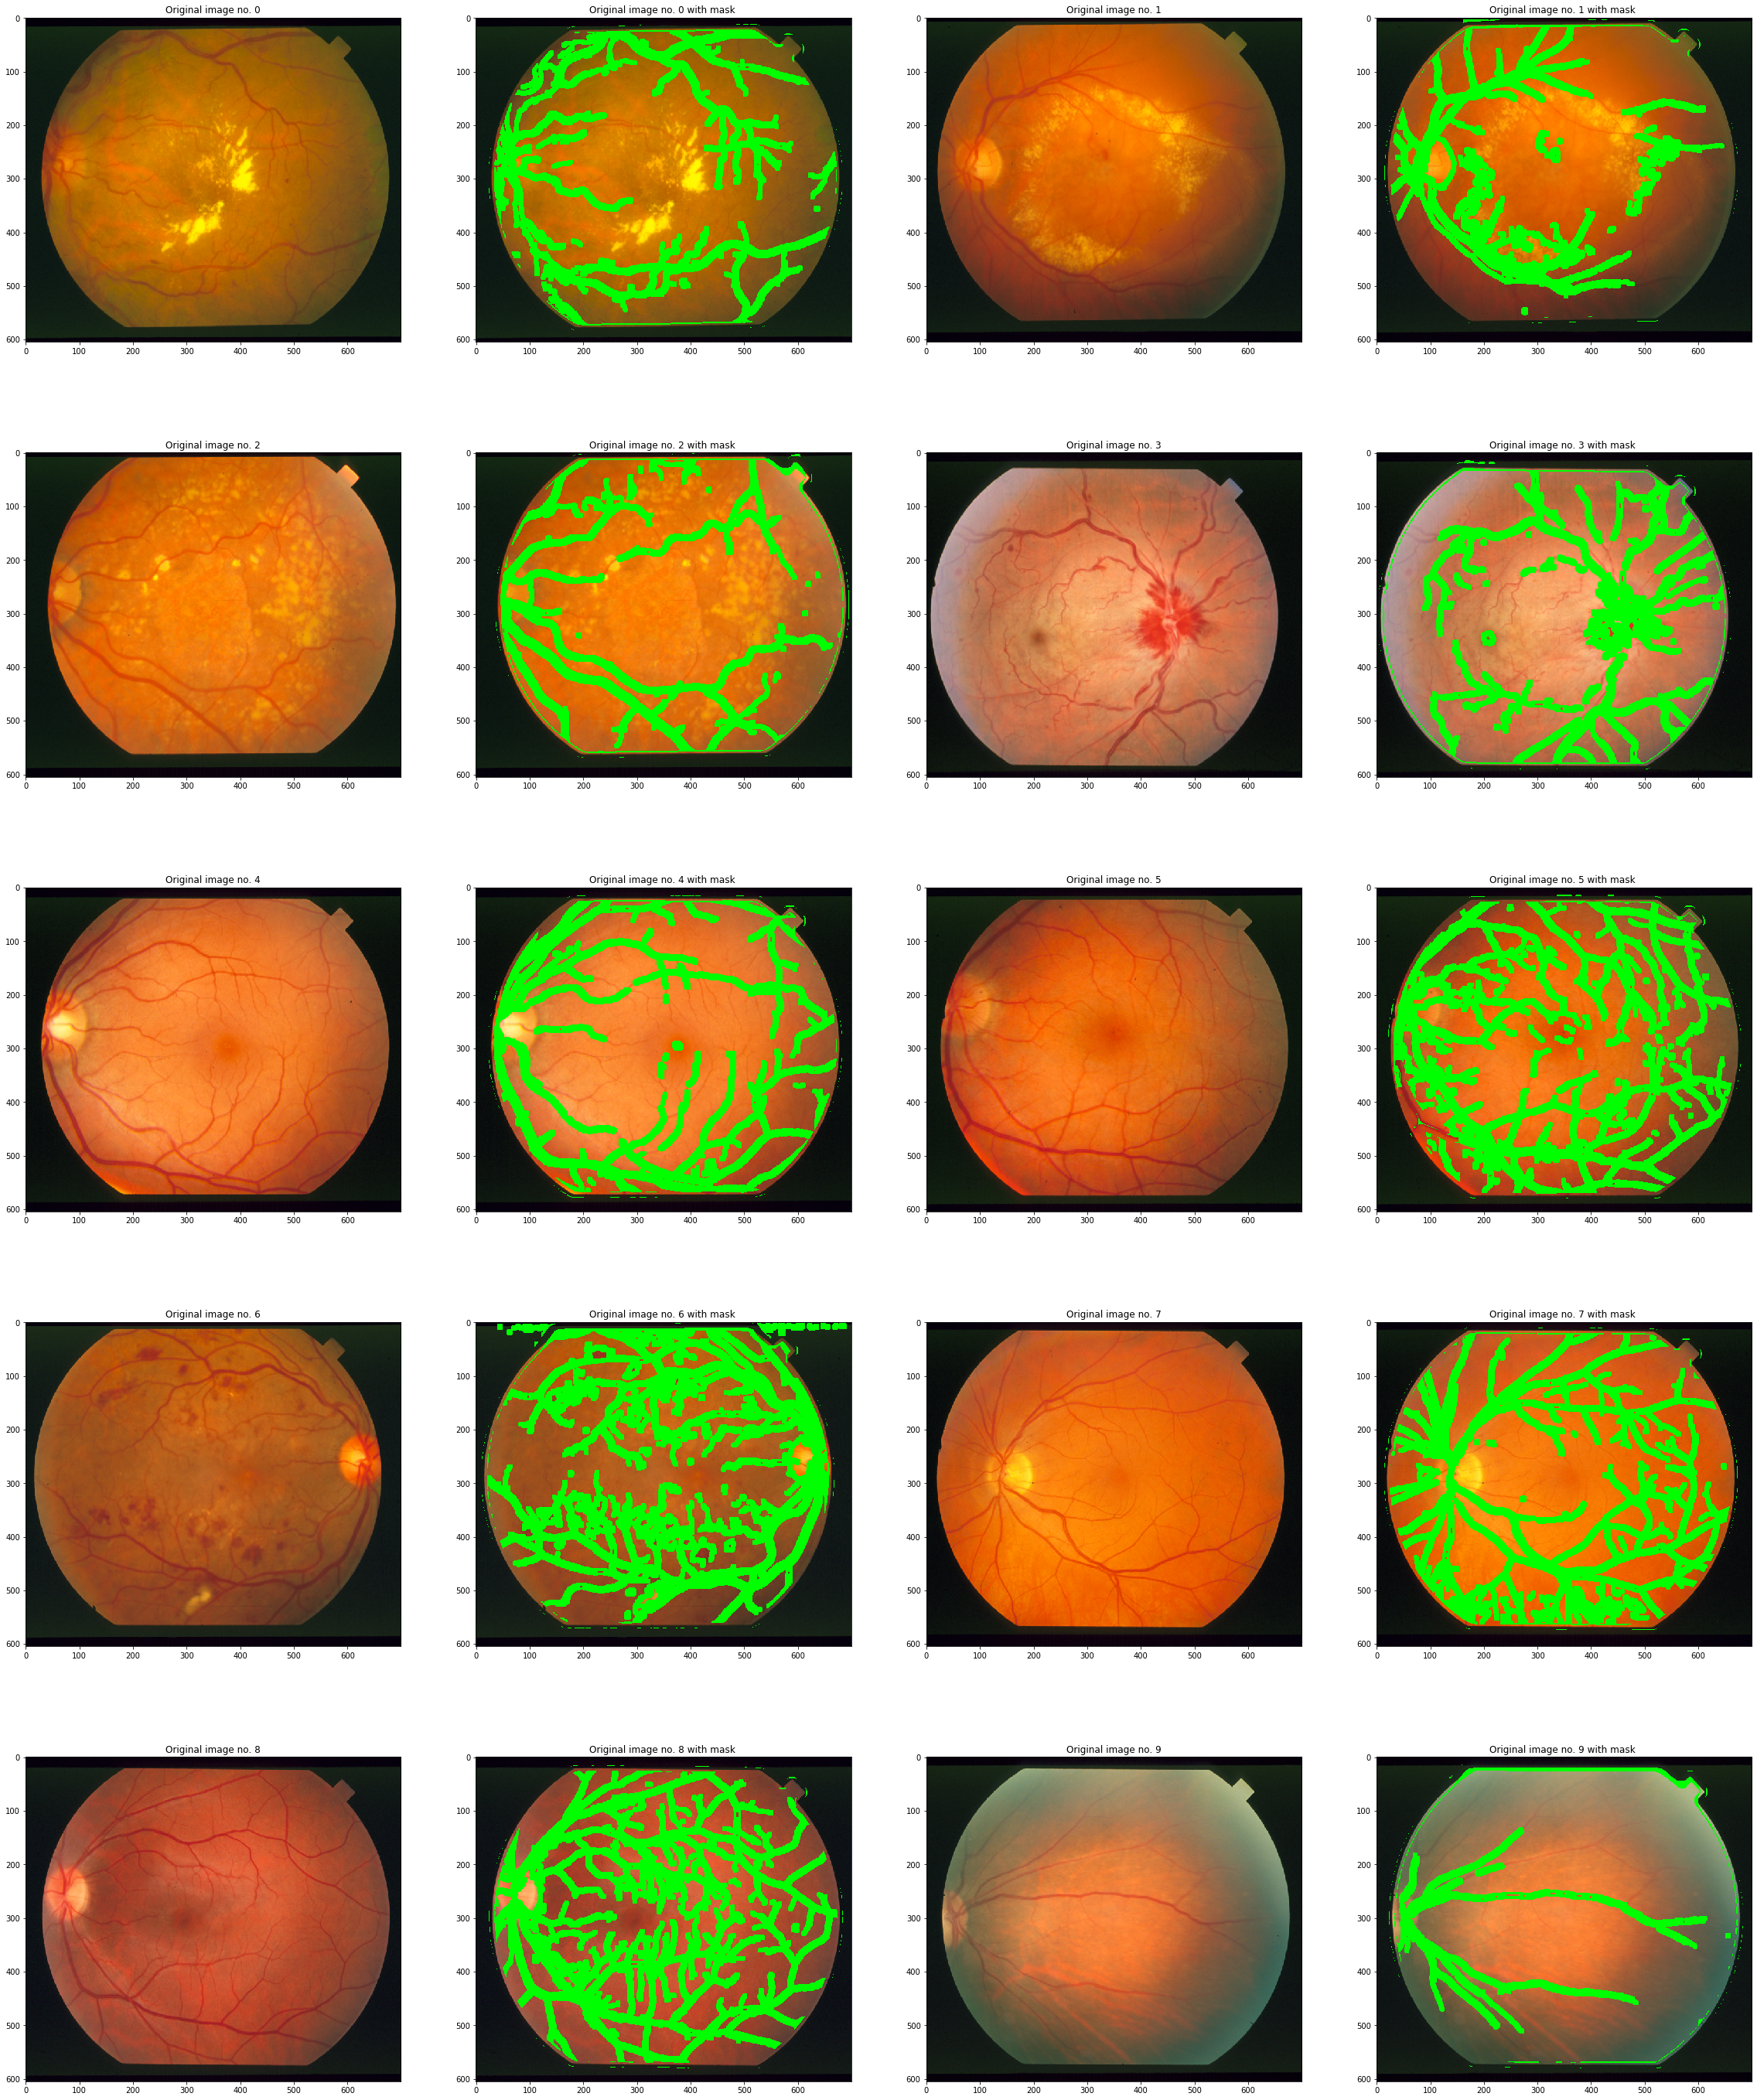

In [41]:
fig, ax = plt.subplots(ncols=4, nrows=len(images.options)//2+(len(images.options)%2), figsize=(40, 10*len(images.options)//2+(len(images.options)%2)))
for i in range(len(images.options)):
    img = imageio.imread(f'stare-images/{images.options[i]}').astype('uint8')
    ax[i//2][0+(i%2)*2].imshow(img.astype('uint8'))
    ax[i//2][0+(i%2)*2].set_title(f'Original image no. {i}')
    img2=apply_mask(img, masks[i])
    ax[i//2][1+(i%2)*2].imshow(img2.astype('uint8'))
    ax[i//2][1+(i%2)*2].set_title(f'Original image no. {i} with mask ',)
fig.savefig('image_mask.png')

In [ ]:
import cv2 as cv